## Voice Categoriztion

### Import Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [3]:
df=pd.read_csv("voice-classification.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


* 20 features
* Label=> male and female
* from data its looking like a noramlize data as its values in between 0-1

In [4]:
# shape of data
df.shape

(3168, 21)

In [5]:
#Check the no. of records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

     * no null values
     * all data in float expect the target  

In [6]:
#Check the distribution of data
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
# checking for null value
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
print("Shape of the data:", df.shape)
print("Total number of Label: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label=="male"].shape[0]))
print("Number of female: {}".format(df[df.label=="female"].shape[0]))

Shape of the data: (3168, 21)
Total number of Label: 3168
Number of male: 1584
Number of female: 1584


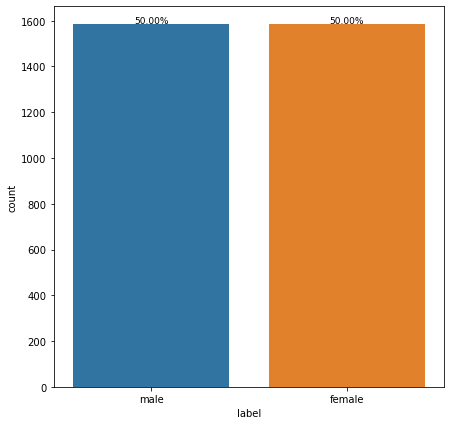

In [9]:
plt.figure(figsize=(7,7))
fig=sns.countplot(x='label', data=df)
sizes=[]
for p in fig.patches:
    height = p.get_height()
    sizes.append(height)
    fig.text(p.get_x()+p.get_width()/2, height + 4,
             '{:1.2f}%'.format(height/len(df)*100),ha='center', fontsize=9)

#### Features

In [10]:
X=df.iloc[:,:-1]
print(X.shape)

(3168, 20)


#### labels-convert label coloum

In [11]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

gender_encoder=LabelEncoder()
y=gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

 * male=1
 * female=0

#### Scaling-Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

* StandardScalar=> used std to scale data in bet -1 to 1
* MinMaxScalar=> used normalize the data into any range 

* scalling part is applied on features

### Train-test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7, random_state = 123)
print(X_train.shape)
print(X_test.shape)

(2217, 20)
(951, 20)


### Train a Model

In [14]:
from sklearn import svm

In [15]:
#All hyperparamer as default
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)   # training


SVC()

In [16]:
svm_model.score(X_test, y_test)

0.9779179810725552

#### Model Evalution

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [18]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = svm_model.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[477  11]
 [ 10 453]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       488
           1       0.98      0.98      0.98       463

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



<AxesSubplot:>

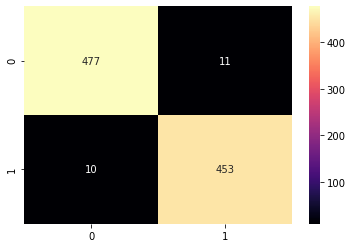

In [19]:
sns.heatmap(confusion_matrix(y_test, predict_test), annot=True, fmt='0.0f', cmap='magma')

### Hyperparameter

#### Kernel Trick = 'linear'
  * kernel = 'linear'
  * C value, Higher the 'C' values decision boundry will be hard margin. Lower the C value decision boundry will be soft margin.
  * gamma = Choose this as decimal values [0.1, 0.01, 0.0001]
  * for multiclass classification choose option b/w 'ovr' (one vs rest all) & ovo (one class vs another class)


#### Kernel= "Linear"

In [20]:
#with Hyperparameter
#kernel= shape of Classifier
#gamma= related to only non-linear function
#desision_function_shape='ovr' or 'ovo'
#ovo,ovr used for multiclass classification
svm_model = svm.SVC(C=1e4, kernel='linear')
svm_model.fit(X_train, y_train)   # training

SVC(C=10000.0, kernel='linear')

In [21]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = svm_model.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[473  15]
 [ 12 451]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       488
           1       0.97      0.97      0.97       463

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



#### Kernel='rbf'

In [22]:
#with Hyperparameter
#kernel= shape of Classifier
#gamma= related to only non-linear function
#desision_function_shape='ovr' or 'ovo'
#ovo,ovr used for multiclass classification
svm_model = svm.SVC(C=1e4, gamma=0.1, kernel='rbf', decision_function_shape="ovr")
svm_model.fit(X_train, y_train)   # training

SVC(C=10000.0, gamma=0.1)

In [23]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = svm_model.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[481   7]
 [ 11 452]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       488
           1       0.98      0.98      0.98       463

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



#### Kernel='Poly'

In [24]:
#with Hyperparameter
#kernel= shape of Classifier
#gamma= related to only non-linear function
#desision_function_shape='ovr' or 'ovo'
#ovo,ovr used for multiclass classification
svm_model = svm.SVC(C=1e4, gamma=0.1, kernel='poly', decision_function_shape="ovr")
svm_model.fit(X_train, y_train)   # training

SVC(C=10000.0, gamma=0.1, kernel='poly')

In [25]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = svm_model.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[475  13]
 [ 13 450]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       488
           1       0.97      0.97      0.97       463

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



In [30]:
import pickle
pickle.dump(svm_model,open('svm_voice_model.pkl','wb'))
pickle.dump(scaler,open('scaling_voice.pkl','wb'))

# End